In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.interpolate import interp1d
%matplotlib inline

In [12]:
def load_Q(path):
    data = open(path,"r")
    parsed = []
    for line in data:
        parsed.append(np.array(line.split()).astype(float))
    return np.array(parsed)[:,0]

Q1_path = "../tables/Q1_1d_a0.2_p0.0_g1.0_np30_ng10000.txt"
Q2_path = "../tables/Q2_1d_a0.2_p0.0_g1.0_np30_ng10000.txt"
Q3_path = "../tables/Q3_1d_a0.2_p0.0_g1.0_np30_ng10000.txt"
Q1_parsed = load_Q(Q1_path)
Q2_parsed = load_Q(Q2_path)
Q3_parsed = load_Q(Q3_path)

s_arr = np.logspace(0,np.log10(11),30) - 1
Q1_func = interp1d(s_arr,np.log10(-Q1_parsed + 1e-30),fill_value='extrapolate')
Q2_func = interp1d(s_arr,np.log10(Q2_parsed + 1e-30),fill_value='extrapolate')
Q3_func = interp1d(s_arr,np.log10(Q3_parsed + 1e-30),fill_value='extrapolate')

In [23]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

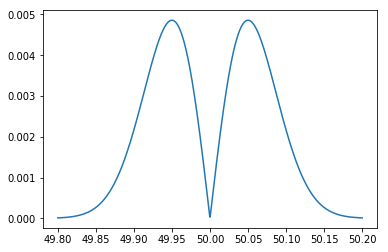

In [37]:
HoR=1e-3
radii = np.array([10.,50.,100.,200.])
sig = radii[1]*HoR
mu  = radii[1]

x = np.linspace(-4.*sig,4.*sig,1000) + mu
density_gauss = gaussian(x,mu,sig)
plt.plot(x,density_gauss)

'''def reduce_me(warp_params,x,density):
    warp_mu = 0.0
    warp = gaussian(x,warp_mu,warp_sig)
    Q1 = -1. * 10.**Q1_func(warp)
    Q2 = 10.**(Q2_func(warp))
    return np.sum(np.gradient(Q1*density*x) - Q2*density*warp**2.)
    
least_squares(reduce_me,)'''
warp = np.abs(np.gradient(gaussian(x,radii[1],sig)))
plt.clf()
plt.plot(x,warp)
plt.show()